In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.applications import VGG16

In [4]:
import pathlib
data_train = 'D:/07 Skripsi/datates/train'
data_test = 'D:/07 Skripsi/datates/test'

In [5]:
#preprocessing data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
            data_train,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=16)
test_generator = test_datagen.flow_from_directory(
            data_test,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=15)

Found 372 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [11]:
base_model = VGG16(input_shape = (150,150,3),
                  include_top=False,
                  weights='imagenet')

In [12]:
for layer in base_model.layers:
    layer.trainable=False

In [13]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [14]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(6, activation = 'softmax')(x)

model = Model (base_model.input,x)

In [15]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [16]:
history = model.fit(
        train_generator,
        epochs = 25,
        steps_per_epoch=23,
        validation_data = test_generator,
        verbose = 1,
        validation_steps=20)

Epoch 1/25
23/23 [==============================] - 190s 8s/step - loss: 1.5559 - accuracy: 0.4719 - val_loss: 1.0751 - val_accuracy: 0.5233
Epoch 2/25
23/23 [==============================] - 171s 8s/step - loss: 0.7539 - accuracy: 0.7247 - val_loss: 0.8384 - val_accuracy: 0.6967
Epoch 3/25
23/23 [==============================] - 164s 7s/step - loss: 0.5470 - accuracy: 0.8230 - val_loss: 0.8188 - val_accuracy: 0.6933
Epoch 4/25
23/23 [==============================] - 165s 7s/step - loss: 0.3795 - accuracy: 0.8820 - val_loss: 0.7249 - val_accuracy: 0.7633
Epoch 5/25
23/23 [==============================] - 165s 7s/step - loss: 0.3078 - accuracy: 0.9185 - val_loss: 0.6881 - val_accuracy: 0.7500
Epoch 6/25
23/23 [==============================] - 163s 7s/step - loss: 0.2001 - accuracy: 0.9663 - val_loss: 0.6764 - val_accuracy: 0.7633
Epoch 7/25
23/23 [==============================] - 167s 7s/step - loss: 0.1460 - accuracy: 0.9747 - val_loss: 0.6522 - val_accuracy: 0.7800
Epoch 8/25
23

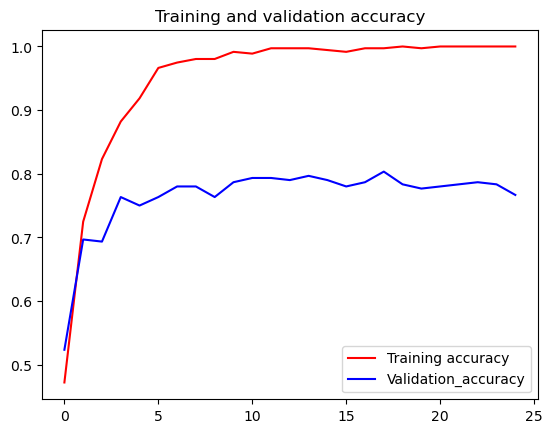

<Figure size 640x480 with 0 Axes>

In [17]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
1